In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

antonkozyriev_game_recommendations_on_steam_path = kagglehub.dataset_download('antonkozyriev/game-recommendations-on-steam')
wahyuazizi_kaggleapi_path = kagglehub.dataset_download('wahyuazizi/kaggleapi')

print('Data source import complete.')


# **Laporan Proyek Machine Learning - Wahyu Azizi**

## **Project Overview**

Perkembangan platform game **Steam** menunjukkan pertumbuhan yang signifikan dalam beberapa tahun terakhir, baik dari segi jumlah game yang tersedia maupun fitur-fitur yang ditawarkan. Steam telah mengalami lonjakan koleksi judul game dalam lima tahun terakhir. Pada tahun 2019, Steam memiliki sekitar 8.134 judul game, yang meningkat menjadi 14.532 judul pada tahun 2023. Hal ini menunjukkan pertumbuhan yang impresif dan menjadikan Steam sebagai salah satu platform dengan koleksi game terluas di industri.[[1](https://eraspace.com/artikel/post/sejumlah-perbandingan-steam-dan-epic-games-mana-yang-terbaik)]

Banyak faktor yang mempengaruhi pertumbuhan platform Steam, salah satunya adalah **sistem rekomendasi** yang dikembangkan pada platform ini. Sistem ini memungkinkan pengguna mendapatkan rekomendasi yang dipersonalisasi. Dengan menggunakan algoritma yang menganalisis preferensi dan perilaku pengguna, platform dapat menawarkan rekomendasi game yang lebih relevan. Ini membantu pengguna menemukan game yang sesuai dengan minat mereka, sehingga meningkatkan kemungkinan mereka untuk melakukan pembelian.[[2](https://www.semanticscholar.org/paper/Implementasi-Chatbot-Telegram-untuk-Meningkatkan-Yuwan-Soelistijadi/fe61864360798ba62bada1ea70b790a0bd6e5f69)]  
Personalisasi memungkinkan interaksi yang lebih baik antara pengguna dan platform. Ketika pengguna merasa bahwa rekomendasi yang diberikan sesuai dengan keinginan mereka, mereka cenderung lebih terlibat dan loyal terhadap platform tersebut.[[3](https://www.semanticscholar.org/paper/Analisis-Penerapan-UI-UX-Dalam-Meningkatkan-Pada-Syafei-Hidayatullah/ca7cfbaa16740716159ba1660203ce012d26ba16)]  

Rekomendasi yang tepat juga dapat meningkatkan tingkat konversi penjualan. Pengguna lebih cenderung membeli game yang direkomendasikan jika mereka merasa bahwa permainan tersebut sesuai dengan preferensi mereka. Dengan demikian, rekomendasi yang relevan dapat meningkatkan pendapatan bagi platform.[[4](https://www.semanticscholar.org/paper/Implementasi-Chatbot-Telegram-untuk-Meningkatkan-Yuwan-Soelistijadi/fe61864360798ba62bada1ea70b790a0bd6e5f69)] Selain itu, pengalaman yang dipersonalisasi membuat pengguna merasa dihargai dan diperhatikan. Hal ini dapat membangun loyalitas jangka panjang terhadap platform, karena pengguna cenderung kembali untuk mencari rekomendasi di masa depan.  
[[5](https://www.semanticscholar.org/paper/Analisis-Penerapan-UI-UX-Dalam-Meningkatkan-Pada-Syafei-Hidayatullah/ca7cfbaa16740716159ba1660203ce012d26ba16)]  

Untuk membangun sistem rekomendasi, terdapat beberapa teknik yang umum digunakan, antara lain:  

1. **Collaborative Filtering (CF):**  
   Pendekatan ini berfokus pada perilaku pengguna dan interaksi antar pengguna untuk memberikan rekomendasi.  

2. **Content-Based Filtering (CBF):**  
   Teknik ini berfokus pada karakteristik item untuk memberikan rekomendasi. Metode ini menganalisis fitur-fitur dari item dan membandingkannya dengan preferensi pengguna. Misalnya, dalam sistem rekomendasi film, CBF mempertimbangkan genre, aktor, dan sutradara dari film yang telah ditonton oleh pengguna sebelumnya.  

Dalam proyek ini, saya akan menggunakan data rekomendasi game pada Steam yang tersedia di Kaggle. Data tersebut akan menjadi dasar dalam membangun sistem rekomendasi berbasis machine learning.  


## **Business Understanding**

### **Problem Statements**

1. Bagaimana cara mengembangkan sistem rekomendasi yang dipersonalisasi untuk platform Steam menggunakan data pengguna?
2. Bagaimana tingkat kepuasan pengguna terhadap game yang dimainkan?
3. Game apa yang populer dimainkan oleh pengguna?

### **Goals**

1. Membuat sistem rekomendasi yang dipersonalisasi untuk platform Steam menggunakan pendekatan Collaborative Filtering dan Content-based Filtering berbasis model deep learning.
2. Mengevaluasi tingkat kepuasan pengguna terhadap game yang dimainkan berdasarkan rasio ulasan positif.
3. Mengidentifikasi game yang paling populer berdasarkan jumlah ulasan, rating, harga dan durasi bermain.

### **Solutions**

#### **1. Pengembangan Sistem Rekomendasi**
- **Pendekatan:**
  - **Collaborative Filtering:** Rekomendasi berdasarkan pola interaksi pengguna dan game.
  - **Content-Based Filtering:** Rekomendasi berdasarkan atribut game, seperti genre dan deskripsi.
- **Implementasi:**
  - Gunakan **deep learning** untuk Collaborative Filtering.
  - Evaluasi model dengan metrik seperti RMSE dan Precision.

#### **2. Eksplorasi Data (EDA)**
- **Analisis Data:**
  - Visualisasikan distribusi data seperti harga game, ulasan, dan durasi bermain.
  - Identifikasi faktor yang memengaruhi harga, ulasan, dan durasi bermain.
- **Tools:**
  - Gunakan **Python** (Pandas, Matplotlib, Seaborn) untuk manipulasi data dan visualisasi.
  - Tampilkan hasil dengan grafik sederhana seperti histogram atau heatmap.

**Hasil yang Diharapkan:**
- Sistem rekomendasi yang relevan untuk pengguna.
- Wawasan faktor-faktor penting yang memengaruhi aspek game di Steam.

## Import Library

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras import layers

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib.patches import ConnectionPatch
%matplotlib inline
sns.set_theme()

## **Data Understanding**

Lakukan proses data understanding, ini termasuk data loading, memeriksa tipe data pada variabel, missing value, dan duplikasi data, setelah itu memberikan detail deskripsi variabel

### **Data Loading**  

Data yang digunakan merupakan data game pada sebuah platform game yaitu Steam. data bisa didapatkan dengan mengklik [link ini](https://www.kaggle.com/datasets/antonkozyriev/game-recommendations-on-steam)

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("antonkozyriev/game-recommendations-on-steam")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/game-recommendations-on-steam


In [ ]:
import os
import pandas as pd

df_game = []
for file in os.listdir(path):

    file_path = os.path.join(path, file)
    print(f"Reading {file} ...")

    if file == "users.csv":
        df_users = pd.read_csv(file_path)
    elif file == "games.csv":
        df_games = pd.read_csv(file_path)
    elif file == "games_metadata.json":
        df_meta = pd.read_json(file_path, lines=True)
    else:
        df_recom = pd.read_csv(file_path)


print("Selesai!")

Reading games_metadata.json ...
Reading users.csv ...
Reading games.csv ...
Reading recommendations.csv ...
Selesai!


Di projek ini saya akan menggunakan games_metadata.json, games.csv, dan recommendations.csv

### **Identifikasi Missing Value, Data Duplikasi, dan Tipe Data**

Selanjutnya adalah memeriksa beberapa hal dalam data, seperti missing value, data duplikasi, dan memerika tipe data pada variabel.

#### **df_games**

In [ ]:
df_games.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


In [ ]:
print(f"Shape: {df_games.shape}\n")
df_games.info()

Shape: (50872, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int64  
 8   user_reviews    50872 non-null  int64  
 9   price_final     50872 non-null  float64
 10  price_original  50872 non-null  float64
 11  discount        50872 non-null  float64
 12  steam_deck      50872 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


In [ ]:
print(f"Jumlah Data Duplikasi: {df_games.duplicated().sum()}\n")
pd.DataFrame({'Daftar Missing Value: ': df_games.isnull().sum()})

Jumlah Data Duplikasi: 0



,Daftar Missing Value:
app_id,0
title,0
date_release,0
win,0
mac,0
linux,0
rating,0
positive_ratio,0
user_reviews,0
price_final,0


Data ```df_games``` memiliki jumlah row sebanyak 50872 row data, dengan total variabel sebanyak 13 variabel. Beberapa tipe data yang ada adalah float, integer, boolean, dan juga object (termasuk string, dan date), tidak ada masalah dalam tipe data pada data ```df_games```. Selain itu tidak ditemukan data yang hilang ataupun terduplikasi.

#### **df_recom**

In [ ]:
df_recom.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,51580,0
1,304390,4,0,2017-02-17,False,11.5,2586,1
2,1085660,2,0,2019-11-17,True,336.5,253880,2
3,703080,0,0,2022-09-23,True,27.4,259432,3
4,526870,0,0,2021-01-10,True,7.9,23869,4


In [ ]:
print(f"Shape: {df_recom.shape}\n")

df_recom.info()

Shape: (41154794, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41154794 entries, 0 to 41154793
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          int64  
 1   helpful         int64  
 2   funny           int64  
 3   date            object 
 4   is_recommended  bool   
 5   hours           float64
 6   user_id         int64  
 7   review_id       int64  
dtypes: bool(1), float64(1), int64(5), object(1)
memory usage: 2.2+ GB


In [ ]:
print(f"Jumlah Data Duplikasi: {df_recom.duplicated().sum()}\n")
pd.DataFrame({'Daftar Missing Value: ': df_recom.isnull().sum()})

Jumlah Data Duplikasi: 0



,Daftar Missing Value:
app_id,0
helpful,0
funny,0
date,0
is_recommended,0
hours,0
user_id,0
review_id,0


```df_recom``` merupakan data rekomendasi pada game, memiliki total row sebanyak 41154794 row, dan memiliki 8 variabel. Tidak ada masalah pada tipe data pada variabel, dan juga tidak ditemukan missing value dan data yang terduplikasi.

#### **df_meta**

In [ ]:
df_meta.head()

,app_id,description,tags
0,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,,[Action]
2,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."


In [ ]:
print(f"Shape: {df_meta.shape}\n")

df_meta.info()

Shape: (50872, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   app_id       50872 non-null  int64 
 1   description  50872 non-null  object
 2   tags         50872 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


Sebelum mengidentifikasi data duplikasi, perlu diperhatikan bahwa value pada variabel ```tags``` adalah dalam bentuk list, untuk itu variabel ini harus diubah menjadi string

In [ ]:
# Ubah kolom 'tags' menjadi string jika diperlukan
# df_meta['tags'] = df_meta['tags'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else '')
df_meta['tags'] = df_meta['tags'].apply(
    lambda x: np.nan if not x or (isinstance(x, list) and len(x) == 0) else ' '.join(map(str, x))
)

In [ ]:
df_meta.sample(5)

,app_id,description,tags
16563,1515740,"Volley, Tennis or Soccer - choose your favorit...",Football (Soccer) Sports Casual Arcade Tennis ...
47209,1918970,Eresys is a co-op horror game inspired from th...,Action Horror Online Co-Op Adventure Multiplay...
28424,1920820,唐风还是和风，野史还是仙侠，一款全新画风的仙侠游戏等你来体验。,RPG Casual Mythology Action RPG 3D Platformer ...
38197,1244380,Pirates? Pirates! is a Reigns-inspired pirate ...,Casual RPG Strategy Adventure Indie Card Game ...
24458,1600890,This is a click game with horror theme to find...,Psychological Horror Hidden Object Hand-drawn ...


In [ ]:
print(f"Jumlah Data Duplikasi: {df_meta.duplicated().sum()}\n")
pd.DataFrame({'Daftar Missing Value: ': df_meta.isnull().sum()})

Jumlah Data Duplikasi: 0



,Daftar Missing Value:
app_id,0
description,0
tags,1244


data pada ```df_meta``` sendiri memiliki total row sebanyak 50872 entries, dengan jumlah variabel sebanyak 3 variabel. Tidak ada masalah pada tipe data, data duplikasi juga nol, tapi terdapat nilai pada variabel tags yang hilang, sebanyak 1244 tags.

___

Menggabungkan beberapa data menjadi satu sebelum melakukan analysis dan data preparation, serta identifikasi missing value.

In [ ]:
# Merge data game, metadata dengan recommendation
df_games_meta = pd.merge(df_games, df_meta, on='app_id', how='left')

# Merge data game dengan recommendation
df_games_rec = pd.merge(df_games, df_recom, on='app_id', how='left')

In [ ]:
df_games_rec.isna().sum()

app_id                0
title                 0
date_release          0
win                   0
mac                   0
linux                 0
rating                0
positive_ratio        0
user_reviews          0
price_final           0
price_original        0
discount              0
steam_deck            0
helpful           13262
funny             13262
date              13262
is_recommended    13262
hours             13262
user_id           13262
review_id         13262
dtype: int64

In [ ]:
df_games_meta.isna().sum()

app_id               0
title                0
date_release         0
win                  0
mac                  0
linux                0
rating               0
positive_ratio       0
user_reviews         0
price_final          0
price_original       0
discount             0
steam_deck           0
description          0
tags              1244
dtype: int64

### **Exploratory Data Analysis - Deskripsi Variabel**

Berikut daftar deksripsi variabel yang ada pada data yang sudah di load.

#### df_games
| **Nama Variabel**   | **Deskripsi**                                                                 |
|----------------------|-----------------------------------------------------------------------------|
| `app_id`            | ID unik untuk setiap game.                                                 |
| `title`             | Judul dari game.                                                          |
| `date_release`      | Tanggal rilis game dalam format `YYYY-MM-DD`.                             |
| `win`               | Apakah game tersedia untuk platform Windows (`True/False`).               |
| `mac`               | Apakah game tersedia untuk platform MacOS (`True/False`).                |
| `linux`             | Apakah game tersedia untuk platform Linux (`True/False`).                |
| `rating`            | Peringkat keseluruhan dari game berdasarkan ulasan pengguna (e.g., Very Positive). |
| `positive_ratio`    | Persentase ulasan positif dari total ulasan.                              |
| `user_reviews`      | Jumlah total ulasan pengguna untuk game tersebut.                         |
| `price_final`       | Harga akhir setelah diskon (jika ada).                                    |
| `price_original`    | Harga asli sebelum diskon.                                                |
| `discount`          | Besarnya diskon dalam bentuk persentase.                                  |
| `steam_deck`        | Apakah game kompatibel dengan Steam Deck (`True/False`).                  |

---

#### df_recommendation
| **Nama Variabel**   | **Deskripsi**                                                        |
|----------------------|----------------------------------------------------------------------|
| `app_id`            | ID unik untuk game yang diulas.                                     |
| `helpful`           | Jumlah vote "membantu" pada ulasan tersebut.                        |
| `funny`             | Jumlah vote "lucu" pada ulasan tersebut.                            |
| `date`              | Tanggal ulasan dibuat dalam format `YYYY-MM-DD`.                    |
| `is_recommended`    | Apakah pengguna merekomendasikan game tersebut (`True/False`).      |
| `hours`             | Jumlah waktu yang dihabiskan untuk memainkan game tersebut (dalam jam). |
| `user_id`           | ID unik dari pengguna yang memberikan ulasan.                      |
| `review_id`         | ID unik untuk ulasan tertentu.                                      |

---

#### df_metadata
| **Nama Variabel**   | **Deskripsi**                                                               |
|----------------------|---------------------------------------------------------------------------|
| `app_id`            | ID unik untuk setiap game.                                               |
| `description`       | Deskripsi singkat tentang game.                                          |
| `tags`              | Kategori atau tag yang terkait dengan game, seperti genre dan fitur.     |


### **Exploratory Data Analysis - Univariate Analysis**  

Berikut distribusi untuk kategorical features, pada data bisa diketahui bahwa 98% lebih game yang terdapat pada platform Steam mendukung system operasi Windows, sedang sebanyak 75% game tersedia untuk system operasi Mac, dan 82,2% game tersedia dalam system operasi Linux, dan yang terakhir adalah hampir semua game mendukung steam deck.
Distribusi untuk kategori rating dapat disimpulkan bahwa kebanyakan game pada Steam dengan rating positive, artinya Steam sangat memperhatikan game yang masuk kedalam platform mereka.

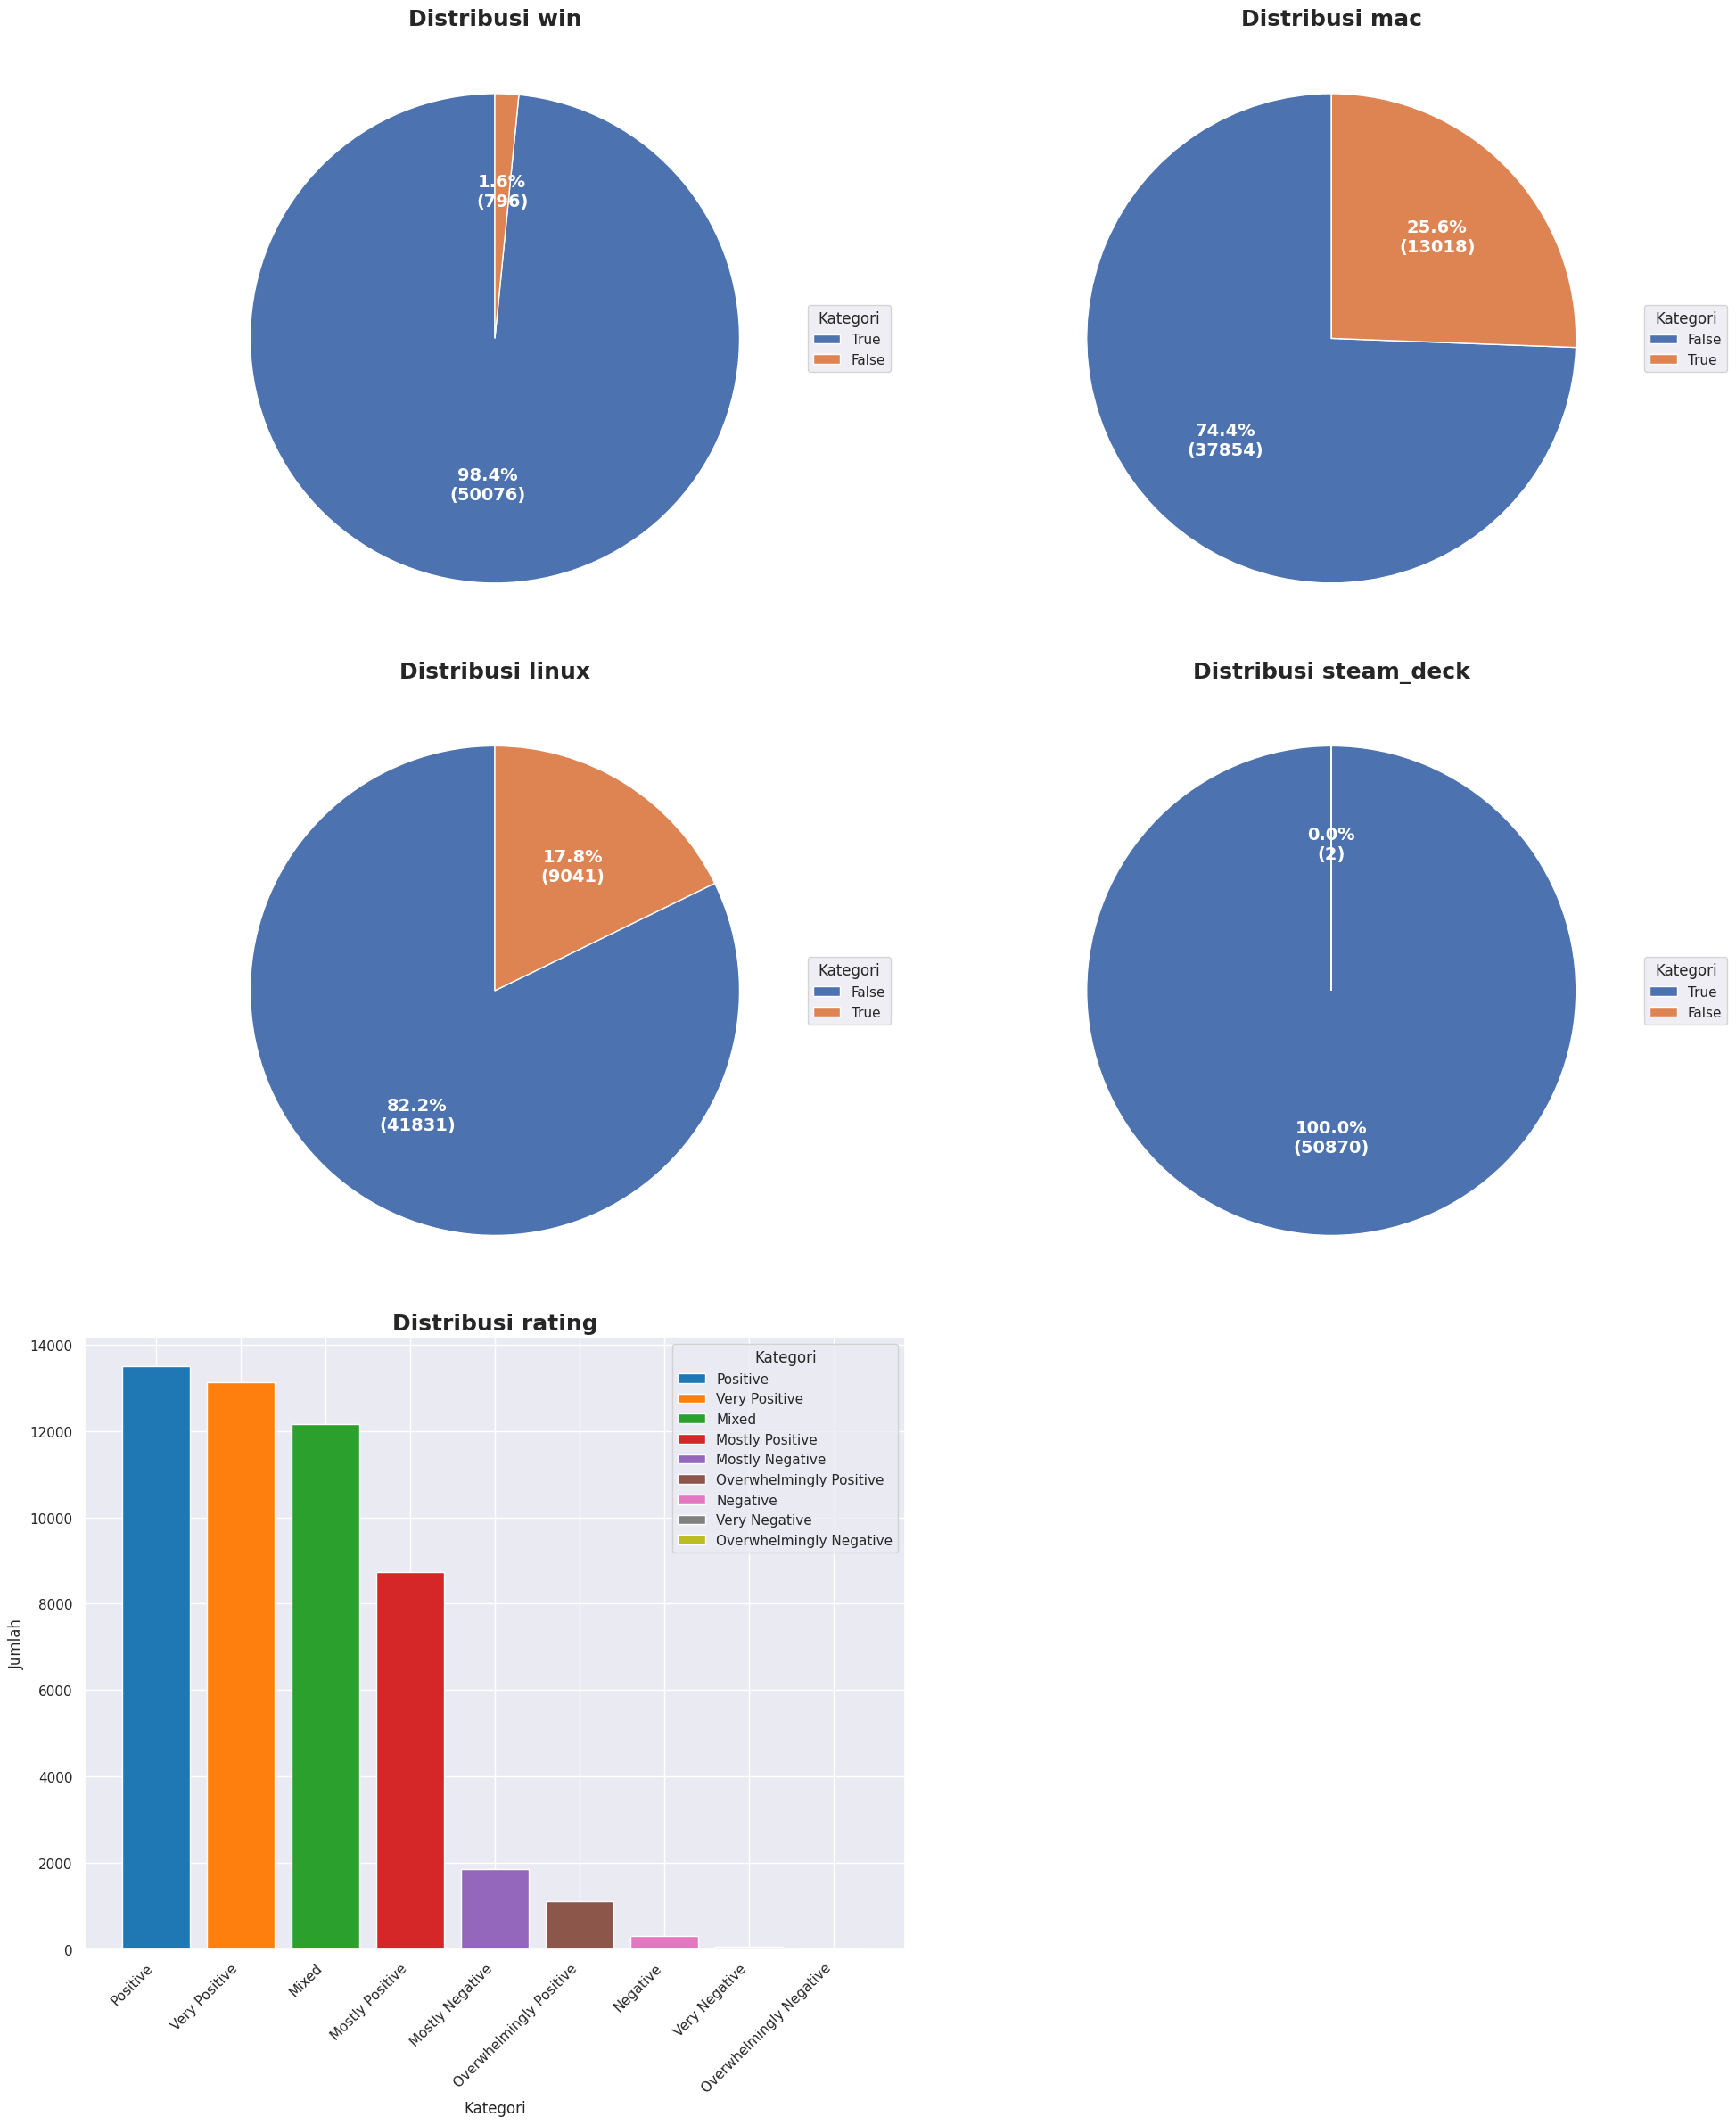

In [ ]:
cat_features = ['win', 'mac', 'linux', 'steam_deck', 'rating']
n_cols = 2
n_rows = (len(cat_features) + n_cols - 1) // n_cols

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 8 * n_rows))
axes = axes.flatten()

# Fungsi untuk menampilkan persentase & jumlah absolut pada pie chart
def func(pct, allvals):
    absolute = int(np.round(pct / 100. * np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute})"


for i, feature in enumerate(cat_features):
    # Hitung distribusi
    count = df_games_meta[feature].value_counts()
    ax = axes[i]

    if feature == 'rating':
        # Gunakan colormap tab10 untuk warna yang harmonis
        cmap = plt.get_cmap('tab10')
        bar_colors = [cmap(i) for i in range(len(count))]

        # Bar Chart
        bars=ax.bar(count.index.astype(str), count.values, color=bar_colors)
        ax.set_xlabel('Kategori')
        ax.set_ylabel('Jumlah')

        ax.set_xticks(range(len(count.index)))
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        # Tambahkan legend
        ax.legend(bars, count.index.astype(str), title="Kategori", loc="upper right")

    else:
        # Pie Chart dengan format dokumentasi Matplotlib bakery
        # colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(count.values)))

        wedges, texts, autotexts = ax.pie(
            count.values, labels=count.index.astype(str),
            autopct=lambda pct: func(pct, count.values),
            textprops=dict(color="w"), startangle=90, wedgeprops={"edgecolor": "white"}
        )

        ax.legend(wedges, count.index.astype(str), title="Kategori", loc="center left",
                  bbox_to_anchor=(1, 0, 0.5, 1))

        plt.setp(autotexts, size=14, weight="bold")

    ax.set_title(f'Distribusi {feature}', fontsize=18, fontweight='bold')

# Hapus subplot kosong jika jumlah fitur ganjil
for j in range(len(cat_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Pada numerical features, yang pertama distribusi dari variable positive_ratio sangat menunjukkan hal positive karna banyaknya rating yang positive sehingga rasio positive yang tinggi juga sangat banyak. Untuk variable price original dan price final, tidak menunjukkan perbedaan yang signifikan, dan ternyata sangat banyak game dengan Harga yang relative rendah bahkan gratis.

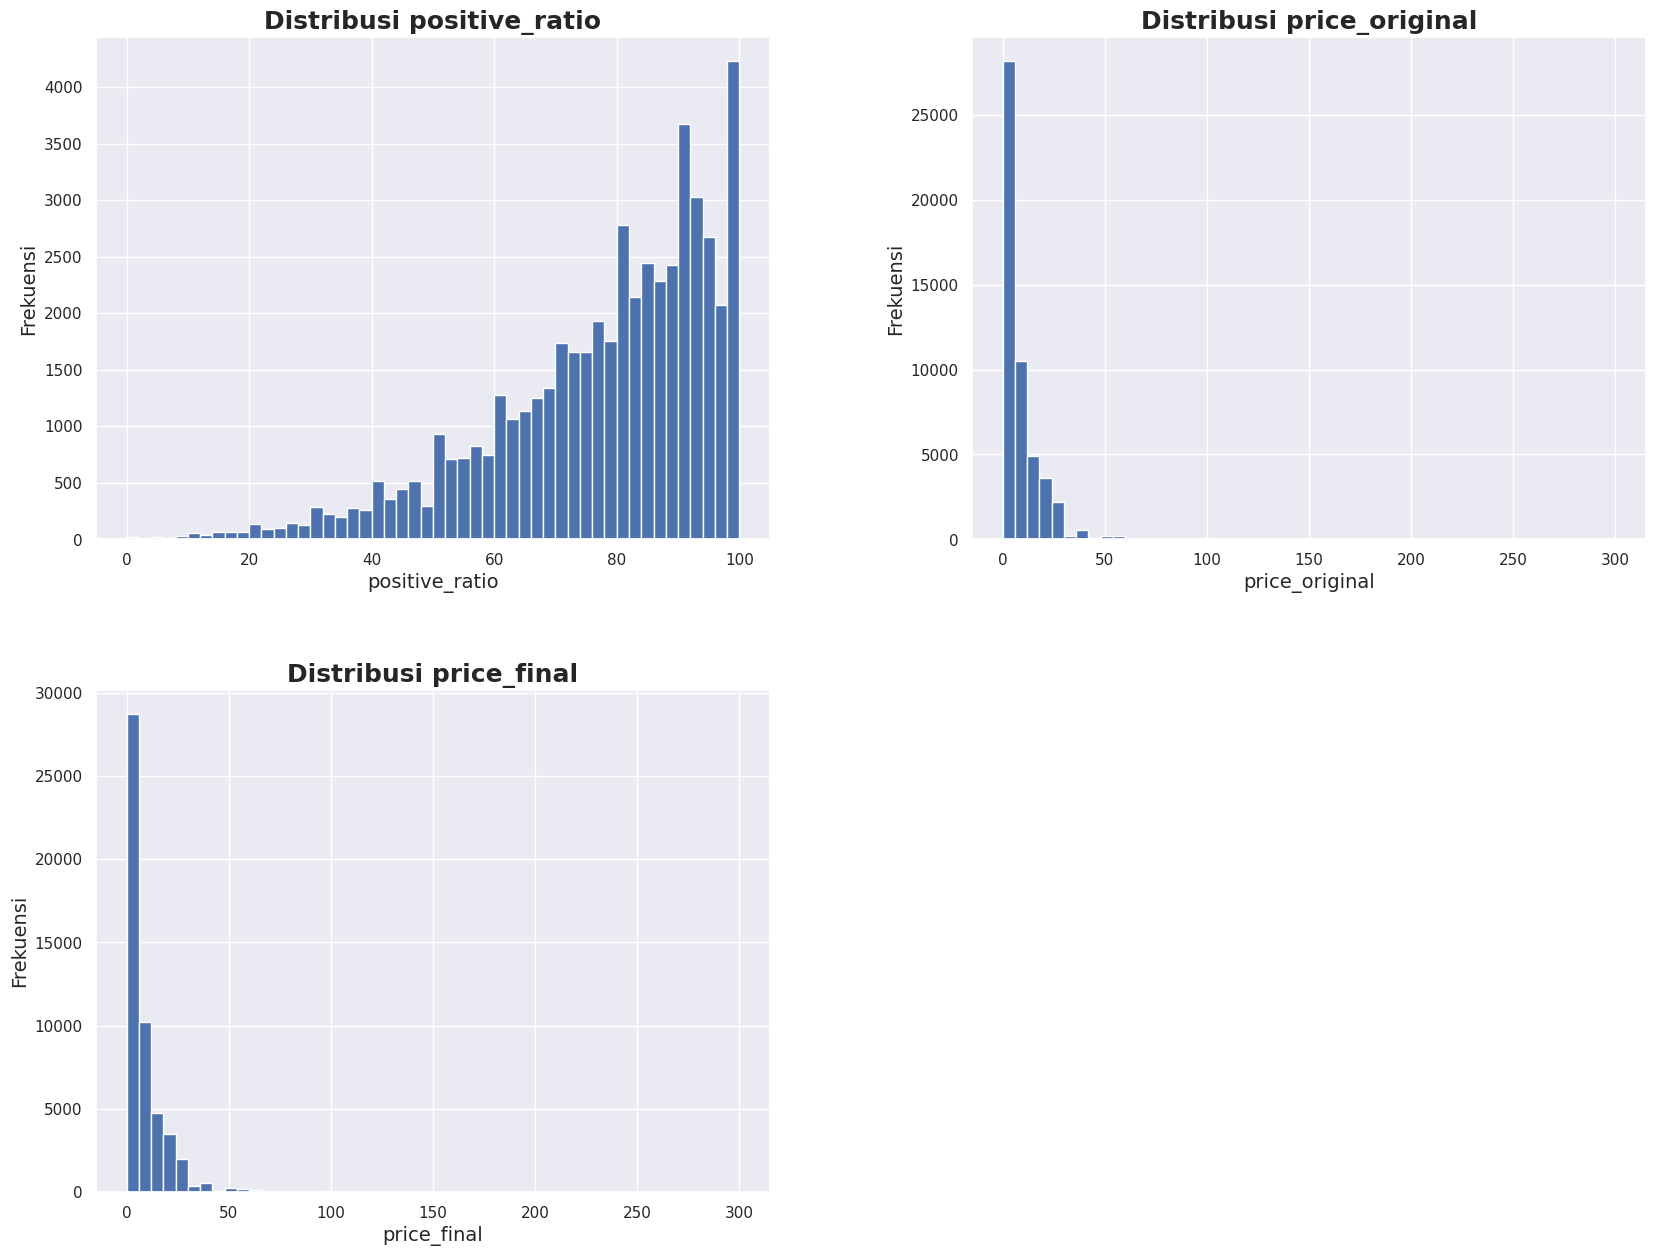

In [ ]:
num_features = df_games_meta[['positive_ratio', 'price_original', 'price_final']]

# Buat histogram
fig = num_features.hist(bins=50, figsize=(20, 15))

# Loop setiap subplot untuk memperbesar title dan menambahkan label
for ax, col in zip(fig.flatten(), num_features.columns):
    ax.set_title(f'Distribusi {col}', fontsize=18, fontweight='bold')  # Perbesar title
    ax.set_xlabel(col, fontsize=14)  # Label X
    ax.set_ylabel('Frekuensi', fontsize=14)  # Label Y

plt.show()


### **Exploratory Data Analysis - Multivariate Analysis**

Selanjutnya, menganalisis game popular berdasarkan beberapa kategori yang berhubungan dengan melakukan analisis ultivariat. Pertama Game terpopuler berdasarkan kategori rating terhadap user_review dimana rating ```Very Positive``` sangat dominan dengan jumlah lebih dari 7e6 user review, beberapa game dalam kategori ini yaitu ```Counter-Strike: Global Offensive``` dengan urutan teratas, diikuti oleh game ```PUBG, dan Terraria``` sebagai top tiga game teratas dari kategori ini.
Selanjutnya berdasarkan rating terhadap price_final, aplikasi teratas adalah ```Clickteam Fusion 2.5 Developer Upgrade``` dengan harga 300 dollar, diikuti oleh software ```Aart Curvy 3D 3.0 dan Houdini Indie```, akan tetapi aplikasi ini mendapat rating yang positive.
Dan terakhir adalah game teratas berdasarkan total jam bermain, dimana ```The Quarry, Bad Rats: the Rat's Revenge, Clicker Heroes 2``` menjadi top tiga game dengan jumlah hours tertinggi dan dengan rating yang sangat positive.

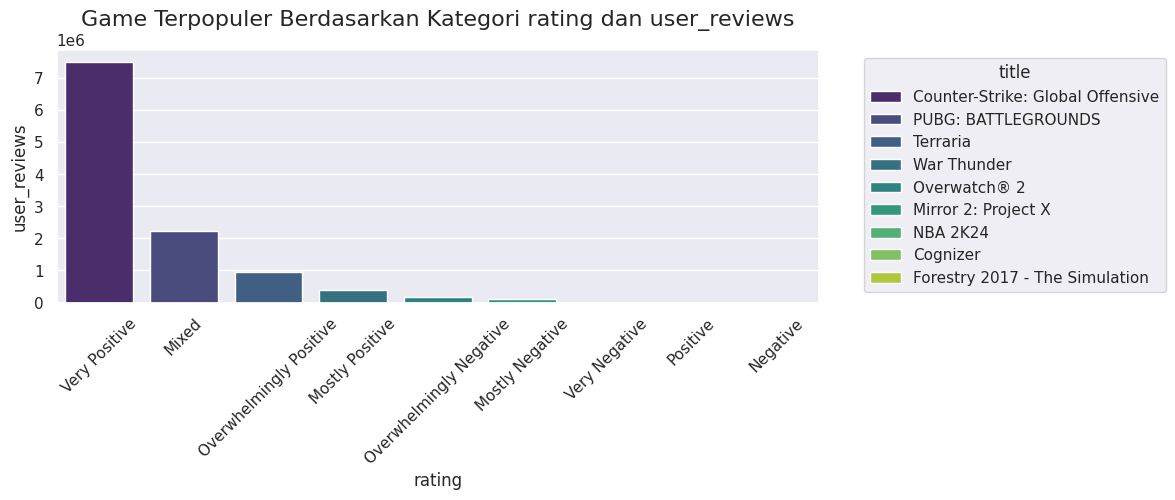

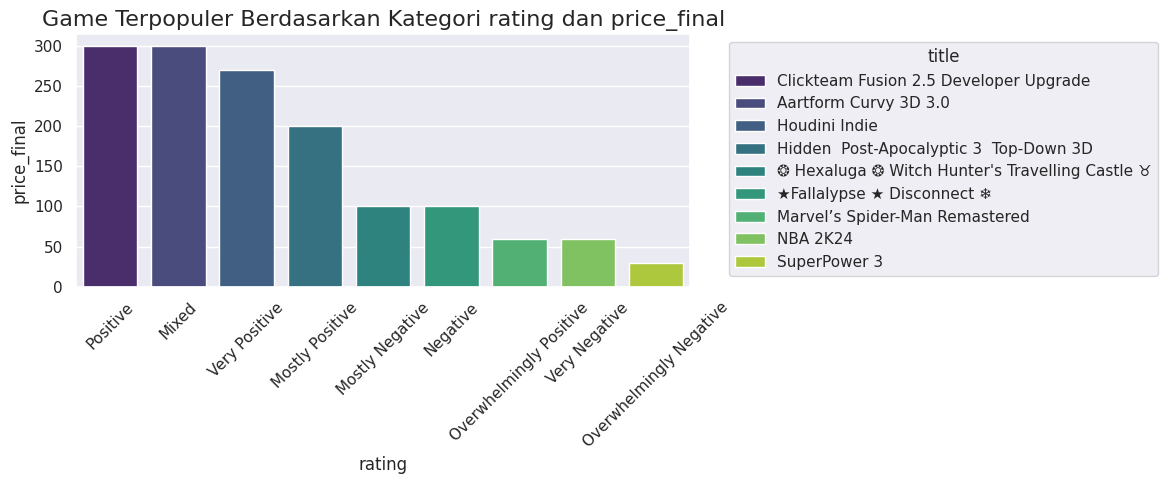

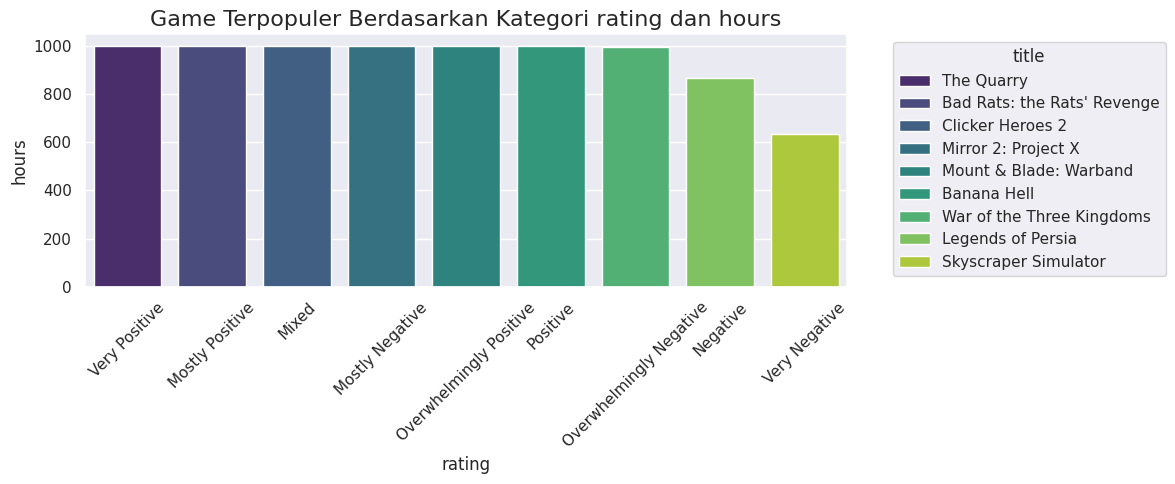

In [ ]:
# Data untuk visualisasi
top_games_by_rating = df_games_meta.sort_values(by='user_reviews', ascending=False).groupby('rating').head(1)
top_games_by_price = df_games_meta.sort_values(by='price_final', ascending=False).groupby('rating').head(1)
top_games_by_hours = df_games_rec.sort_values(by='hours', ascending=False).groupby('rating').head(1)

def plotRating(data, x, y, top):

    # Grafik batang
    plt.figure(figsize=(12, 5))
    sns.barplot(
        data=data,
        x=x,
        y=y,
        hue=top,
        dodge=False,
        palette='viridis'
    )

    # Menambahkan label dan judul
    plt.title(f'Game Terpopuler Berdasarkan Kategori {x} dan {y}', fontsize=16)
    plt.xlabel(f'{x}', fontsize=12)
    plt.ylabel(f'{y}', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title=top, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

plotRating(top_games_by_rating, x='rating', y='user_reviews', top='title')
plotRating(top_games_by_price, x='rating', y='price_final', top='title')
plotRating(top_games_by_hours, x='rating', y='hours', top='title')

## **Data Preparation**

### **Preparation for Content-Based Filtering**

Waktunya mempersiapkan data untuk mengembangkan model machine learning agar bisa digunakan dengan maksimal. Sebelum itu, dikarenakan terbatasnya memori yang bisa digunakan untuk memproses data yang sangat banyak ini, terlebih dahulu dilakukannya filtering data dengan mengambil beberapa sample data, disini menggunakan data mulai dari tahun 2020, kemudian hanyak mengambil sample 10000 dari data tersebut, sehingga yang awalnya data dengan total rows 25880823 menjadi 36700 lalu mengambil 10000 dari data tersebut. Selanjutnya memilih variabel-variabel yang dibutuhkan dalam content-based filtering ini, diantaranya yaitu ```app_id, title, win, mac, Linux, rating, tags```.

In [ ]:
def filter_data(to_data, data):

    start_date = '2020-01-01'
    filtered_data = data[data['date'] >= start_date]

    print(f"Number of rows after date filtering: {filtered_data.shape[0]}")


    return filtered_data

In [ ]:
filtered_data = filter_data(df_games_meta, df_recom)
filtered_data.head()

Number of rows after date filtering: 25880823


,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,51580,0
3,703080,0,0,2022-09-23,True,27.4,259432,3
4,526870,0,0,2021-01-10,True,7.9,23869,4
5,306130,0,0,2021-10-10,True,8.6,45425,5
7,730,0,0,2021-11-30,False,157.5,63209,7


In [ ]:
# Filter df_games_meta berdasarkan app_id yang ada di filtered_data
df_games_meta = df_games_meta[df_games_meta['app_id'].isin(filtered_data['app_id'])]

print(f"Jumlah baris di df_games_meta se: {df_games_meta.shape[0]}")

Jumlah baris di df_games_meta se: 36700


In [ ]:
# Hapus semua baris yang memiliki nilai kosong
df_games_meta = df_games_meta.dropna()

# Periksa jumlah baris dan kolom setelah penghapusan
print(f"Jumlah data setelah drop missing value: {df_games_meta.shape}")

Jumlah data setelah drop missing value: (36123, 15)


In [ ]:
df_games_meta = df_games_meta[:10000]

In [ ]:
df_content_based = df_games_meta[['app_id', 'title', 'win', 'mac', 'linux', 'rating', 'tags']]

### **TF-IDF Vectorizer**

TF-IDF (Term Frequency - Inverse Document Frequency) adalah metode yang digunakan dalam pemrosesan bahasa alami (NLP) untuk mengubah teks menjadi representasi numerik berdasarkan pentingnya kata dalam sebuah dokumen relatif terhadap koleksi dokumen (corpus).TF-IDF digunakan dalam berbagai aplikasi seperti information retrieval, text mining, dan machine learning untuk NLP.  

**1. Apa Itu TF-IDF?**
**TF-IDF (Term Frequency - Inverse Document Frequency)** adalah metode yang digunakan dalam pemrosesan bahasa alami (**NLP**) untuk mengubah teks menjadi representasi numerik berdasarkan pentingnya kata dalam sebuah dokumen relatif terhadap koleksi dokumen (*corpus*).  

TF-IDF digunakan dalam berbagai aplikasi seperti **information retrieval**, **text mining**, dan **machine learning untuk NLP**.

---

**2. Rumus TF-IDF**
**a) Term Frequency (TF)**
Menunjukkan seberapa sering kata muncul dalam sebuah dokumen.  

$$
TF(t, d) = \frac{f(t, d)}{N}
$$

- \( f(t, d) \) = jumlah kemunculan kata \( t \) dalam dokumen \( d \)
- \( N \) = total jumlah kata dalam dokumen \( d \)

**b) Inverse Document Frequency (IDF)**
Mengukur seberapa penting kata dalam keseluruhan koleksi dokumen.  

$$
IDF(t) = \log{\frac{D}{1 + DF(t)}}
$$

- \( D \) = total jumlah dokumen dalam corpus
- \( DF(t) \) = jumlah dokumen yang mengandung kata \( t \)
- Ditambahkan **+1** dalam penyebut untuk menghindari pembagian dengan nol.

**c) TF-IDF Score**
Dihitung dengan mengalikan nilai TF dan IDF:

$$
TF\text{-}IDF(t, d) = TF(t, d) \times IDF(t)
$$

Semakin tinggi nilai **TF-IDF**, semakin penting kata tersebut dalam dokumen.

dari hasi yang ditunjukkan pada table, tags family dimiliki oleh game King of Retail dan Tamarin, selain itu Tamarin memiliki tag stylized, controller dan metroidvania. ini hanya beberapa contoh ayng dapat ditampilkan.

In [ ]:
tfidf = TfidfVectorizer()

tfidf.fit(df_content_based['tags'])
tfidf.get_feature_names_out()

array(['1980s', '1990', '2d', '360', '3d', '40k', '4x', '5d', '6dof',
       'abstract', 'access', 'action', 'addictive', 'adventure',
       'agriculture', 'aliens', 'alternate', 'ambient', 'america',
       'american', 'and', 'animation', 'anime', 'apocalyptic', 'arcade',
       'archery', 'arena', 'artificial', 'arts', 'assassin', 'asymmetric',
       'asynchronous', 'atmospheric', 'attack', 'atv', 'audio', 'auto',
       'automation', 'automobile', 'awkward', 'base', 'baseball', 'based',
       'basketball', 'battle', 'battler', 'beat', 'beautiful',
       'benchmark', 'bikes', 'bit', 'blood', 'bmx', 'board', 'book',
       'boss', 'bowling', 'boxing', 'builder', 'building', 'bullet',
       'campaign', 'capitalism', 'card', 'cartoon', 'cartoony', 'casual',
       'cats', 'character', 'chess', 'choices', 'choose', 'cinematic',
       'city', 'class', 'classic', 'click', 'clicker', 'co', 'cold',
       'collectathon', 'collector', 'colony', 'colorful', 'combat',
       'comedy', 'co

In [ ]:
tfidf_matrix = tfidf.fit_transform(df_content_based['tags'])
tfidf_todense = tfidf_matrix.todense()
tfidf_array = np.asarray(tfidf_todense)
tfidf_encoded = pd.DataFrame(
    tfidf_todense,
    columns=tfidf.get_feature_names_out(),
    index=df_content_based.title
)

In [ ]:
tfidf_encoded.sample(10, axis=1).sample(10, axis=0)

,replay,procedural,choose,vikings,audio,walking,idler,touch,swordplay,choices
title,,,,,,,,,,
Math Fun,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000
Exorcist,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.180559
KILLRUN,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000
Hocus Pocus,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000
Cats Organized Neatly,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000
Doors & Rooms,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000
Arelite Core,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000
Disc Room,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000
Electronic Super Joy,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000


### **Data Preparation for Collaborative Filtering**  

Selanjutnya membangun sistem rekomendasi dengan pendekatan Collaborative Filtering. Pertama melakukan filtering data untuk mengambil sample dengan rentang tertentu agar cukup memori untuk memproses semua ini. Gunakan fungsi yang sudah dibuat sebelumnya, kemudian merge dengan data games untuk mengambil feature yang akan diproses nantinya.

In [ ]:
filtered_data_rec = filter_data(df_games_rec, df_recom)
filtered_data_rec.head()

Number of rows after date filtering: 25880823


,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,51580,0
3,703080,0,0,2022-09-23,True,27.4,259432,3
4,526870,0,0,2021-01-10,True,7.9,23869,4
5,306130,0,0,2021-10-10,True,8.6,45425,5
7,730,0,0,2021-11-30,False,157.5,63209,7


In [ ]:
df_collab = pd.merge(filtered_data_rec, df_games, on='app_id', how='left')

Jangan lupa untuk memilih variabel yang sesuai untuk diproses selanjutnya. Pada Collaborative Filtering ini akan menggunakan fitur ```app_id, user_id, hours, is_recommended, dan rating```

In [ ]:
df_collab_based = df_collab[['user_id', 'app_id', 'hours', 'is_recommended', 'rating']].copy()

# df_collab_based['user_id'] = df_collab_based['user_id'].astype(int)
# df_collab_based['app_id'] = df_collab_based['app_id'].astype(int)

# Cek tipe data untuk memastikan perubahan
print(df_collab_based.dtypes)

# Hapus duplikat berdasarkan app_id
df_collab_based = df_collab_based.drop_duplicates(subset=['app_id'])


user_id             int64
app_id              int64
hours             float64
is_recommended       bool
rating             object
dtype: object


Setelah itu lakukan proses encode pada beberapa variabel yang diperlukan, seperti rating, app_id, dan user_id. Karna variabel rating merupakan kategorikal dengan total 9 jenis rating, dari Overwhelmingly Negative hingga Overwhelmingly Positive. dari kesembilan rating tersebut akan disandi menjadi numerik dari 1-9, agar bisa diproses oleh model nanti.

In [ ]:
# Daftar rating dengan urutan dari yang terburuk ke terbaik
rating_list = [
    'Overwhelmingly Negative',  # 0 - 19% + many reviews -> 1
    'Very Negative',            # 0 - 19%               -> 2
    'Negative',                 # 0 - 39% + few reviews -> 3
    'Mostly Negative',          # 20 - 39%              -> 4
    'Mixed',                    # 40 - 69%              -> 5
    'Mostly Positive',          # 70 - 79%              -> 6
    'Positive',                 # 80 - 99% + few reviews-> 7
    'Very Positive',            # 94 - 80%              -> 8
    'Overwhelmingly Positive'   # 95 - 99%              -> 9
]

# Membuat layer StringLookup dengan vocabulary
rating_encoder = tf.keras.layers.StringLookup(vocabulary=rating_list, num_oov_indices=0)

# Mengubah rating menjadi angka dengan StringLookup
df_collab_based["rating"] = rating_encoder(df_collab_based["rating"]).numpy()

# Cek hasil encoding
df_collab_based.sample(5)


,user_id,app_id,hours,is_recommended,rating
18564706,7117632,888630,8.2,True,5
18565344,12354770,1071330,3.4,False,7
18824318,13802638,511490,11.0,True,4
21514307,9169034,1879750,2.5,True,6
19658704,13233798,541660,0.6,False,7


Selanjutnya melakukan proses encoding user_id dan app_id, kemudian melakukan pemetaan keduanya kedalam dataframe. Selain itu juga memproses rating menjadi float untuk proses selanjutnya dalam proses data normalization

In [ ]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_id = df_collab_based['user_id'].unique().tolist()

# ENcoding User_id
user_to_user_encoded = {x: i for i, x in enumerate(user_id)}

# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_id)}


In [ ]:
# Mengubah app_id menjadi list tanpa nilai yang sama
app_id = df_collab_based['app_id'].unique().tolist()

# ENcoding app_id
app_to_app_encoded = {x: i for i, x in enumerate(app_id)}

# Melakukan proses encoding angka ke ke app_id
app_encoded_to_app = {i: x for i, x in enumerate(app_id)}

In [ ]:
# Mapping userID ke dataframe
df_collab_based['user'] = df_collab_based['user_id'].map(user_to_user_encoded)

# Mapping app_id ke dataframe
df_collab_based['app'] = df_collab_based['app_id'].map(app_to_app_encoded)

In [ ]:
import random
sample_user = random.sample(list(user_to_user_encoded.items()), 3)
print(f"Encoded user_id: {sample_user}")
sample_user_dec = random.sample(list(user_encoded_to_user.items()), 3)
print(f"Encoded angka ke user_id: {sample_user_dec}")

sample_app = random.sample(list(app_to_app_encoded.items()), 3)
print(f"Encoded user_id: {sample_app}")
sample_app_dec = random.sample(list(app_encoded_to_app.items()), 3)
print(f"Encoded angka ke user_id: {sample_app_dec}")

Encoded user_id: [(8839158, 1863), (9777376, 9790), (8046687, 22616)]
Encoded angka ke user_id: [(13384, 12362303), (27751, 11285202), (19727, 14105188)]
Encoded user_id: [(1435700, 17269), (321960, 3005), (596240, 13854)]
Encoded angka ke user_id: [(3496, 2165740), (1795, 268400), (28718, 494100)]


In [ ]:
num_user = len(user_to_user_encoded)
print(f"num of user: {num_user}")

num_app = len(app_encoded_to_app)
print(f"num of app: {num_app}")

num of user: 28334
num of app: 36700


In [ ]:
# Mengubah rating menjadi nilai float
df_collab_based['rating'] = df_collab_based['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df_collab_based['rating'])

# Nilai maksimal rating
max_rating = max(df_collab_based['rating'])

### **Data Normalization**

Proses transformasi data dalam kode ini terdiri dari dua langkah utama. Pertama, kolom hours dimodifikasi menggunakan metode .apply() dengan conditional weighting. Jika pengguna merekomendasikan suatu item (is_recommended == True), maka nilai hours dikalikan 1.25, memberikan bobot lebih tinggi karena dianggap lebih berharga. Sebaliknya, jika pengguna tidak merekomendasikan, nilai hours dikalikan 0.75, mengurangi pengaruhnya dalam model rekomendasi. Transformasi ini bertujuan untuk menyesuaikan kontribusi waktu bermain terhadap sistem rekomendasi, sehingga jam bermain pengguna yang puas memiliki dampak lebih besar dibandingkan yang tidak puas.

Langkah kedua adalah normalisasi rating menggunakan Min-Max Scaling, di mana nilai rating dikonversi ke skala 0 hingga 1 menggunakan rumus:

$$
X_{\text{normalized}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$

di mana:
- \( X \) adalah nilai asli yang akan dinormalisasi  
- \( X_{\text{min}} \) adalah nilai minimum dalam dataset  
- \( X_{\text{max}} \) adalah nilai maksimum dalam dataset  
- \( X_{\text{normalized}} \) adalah nilai hasil normalisasi dalam rentang **[0, 1]**  

Normalisasi ini membantu algoritma **Machine Learning dan Collaborative Filtering** agar bekerja lebih optimal dengan data yang memiliki skala seragam.

Setiap rating dikurangi dengan rating minimum dalam dataset (min_rating), kemudian dibagi dengan selisih antara rating maksimum (max_rating) dan minimum. Teknik ini digunakan untuk memastikan bahwa perbedaan skala rating antar pengguna tidak mempengaruhi sistem rekomendasi secara berlebihan, serta meningkatkan kinerja model dalam perhitungan kesamaan (similarity metrics).

Kedua proses ini merupakan bagian dari data preprocessing dalam Collaborative Filtering, yang bertujuan untuk meningkatkan kualitas rekomendasi dengan memastikan bahwa data memiliki bobot yang sesuai dan skala yang seragam.

In [ ]:
# df_collab_based = df_collab_based.sample(frac=1, random_state=20)

In [ ]:
df_collab_based['hours']= df_collab_based.apply(lambda x: x['hours'] * 1.25 if x['is_recommended'] else x['hours'] * 0.75, axis=1)

scaler = MinMaxScaler()
df_collab_based['hours'] = scaler.fit_transform(df_collab_based[['hours']])

print(df_collab_based['hours'].head())

0    0.036315
1    0.027411
2    0.007903
3    0.008603
4    0.094538
Name: hours, dtype: float64


In [ ]:
# Membuat variabel x dan y
x = df_collab_based[['user', 'app']].values
y_1 = df_collab_based['hours'].values

y_2 = df_collab_based['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
print(x, y_1, y_2)

[[    0     0]
 [    1     1]
 [    2     2]
 ...
 [28331 36697]
 [28332 36698]
 [28333 36699]] [0.03631453 0.02741096 0.00790316 ... 0.0070028  0.00060024 0.0180072 ] [1.    0.875 1.    ... 0.875 0.875 0.875]


### **Membagi Data untuk Training dan Validasi**

Lakukan split data untuk kedua model yang akan dibangun menggunakan Fungsi ```train_test_split``` dari pustaka ```scikit-learn``` untuk membagi dataset menjadi dua bagian: ```training set``` dan ```validation set```. Ini dilakukan agar model dapat belajar dari training set dan diuji performanya di validation set sebelum digunakan pada data baru.

In [ ]:
# Train test split untuk model 1
X_train_h, X_val_h, y_train_h, y_val_h = train_test_split(
    x,
    y_1,
    test_size=0.2,
    random_state=42
)

# Train test split untuk model 2
X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(
    x,
    y_2,
    test_size=0.2,
    random_state=42
)

## **Modeling**

### **Content-based Filtering**

#### **Cosine Similarity**
**Cosine Similarity** adalah metode untuk mengukur kesamaan antara dua vektor berdasarkan sudut (*angle*) di antara keduanya dalam ruang berdimensi tinggi.  

Metode ini sering digunakan dalam **text mining**, **information retrieval**, dan **recommender systems** untuk membandingkan dokumen atau item.

**Rumus Cosine Similarity**
Diberikan dua vektor **A** dan **B**, kesamaan kosinus dihitung dengan:

$$
\cos{\theta} = \frac{A \cdot B}{\|A\| \times \|B\|}
$$

Di mana:
- \( A \cdot B \) = **dot product** antara vektor \( A \) dan \( B \)
- \( \|A\| \) = **norma** (panjang) dari vektor \( A \), dihitung sebagai:

$$
\|A\| = \sqrt{\sum_{i=1}^{n} A_i^2}
$$

- \( \|B\| \) = norma dari vektor \( B \)
- \( \theta \) = sudut antara dua vektor

Nilai **Cosine Similarity** berada dalam rentang **\([-1,1]\)**:
- **1** → Vektor identik (sangat mirip)
- **0** → Tidak ada hubungan (ortogonal)
- **-1** → Vektor berlawanan arah (sangat berbeda)

In [ ]:
# Hitung cosine similarity pada final_df
cos_sim = cosine_similarity(tfidf_array)
cos_sim

array([[1.        , 0.0846129 , 0.36237341, ..., 0.04086519, 0.05889418,
        0.13977438],
       [0.0846129 , 1.        , 0.24366235, ..., 0.02880241, 0.02688899,
        0.09175015],
       [0.36237341, 0.24366235, 1.        , ..., 0.03129268, 0.06363002,
        0.04235115],
       ...,
       [0.04086519, 0.02880241, 0.03129268, ..., 1.        , 0.02034198,
        0.16041007],
       [0.05889418, 0.02688899, 0.06363002, ..., 0.02034198, 1.        ,
        0.01529888],
       [0.13977438, 0.09175015, 0.04235115, ..., 0.16041007, 0.01529888,
        1.        ]])

Observasi dari Sampel:

- Once Again memiliki nilai tinggi dengan Cris Tales (0.318) dan Duck Life (0.178), menunjukkan adanya kesamaan fitur antar game tersebut.
- Sunrider: Liberation Day - Captain's Edition memiliki kesamaan tertinggi dengan Trap Legend (0.498), menunjukkan bahwa tags mereka mungkin sangat mirip.
- Cooking Festival dan Duck Life memiliki kesamaan relatif tinggi (0.329), mungkin karena tema kasual atau mekanisme gameplay yang mirip.
- Beberapa game seperti Reanimation Inc. dan ZANGEKI WARP memiliki nilai yang sangat rendah (mendekati 0), menunjukkan bahwa game tersebut mungkin sangat berbeda dari lainnya.

In [ ]:
cos_sim_df = pd.DataFrame(
    cos_sim,
    index=df_content_based['title'],
    columns=df_content_based['title']
)
print(f"Shape: {cos_sim_df.shape}")
cos_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (10000, 10000)


title,Penko Park,Kholat,Voice of Cards: The Forsaken Maiden,Kokoro Clover Season1,风起长安：驭骨人
title,,,,,
Kombi Travels - Jigsaw Landscapes,0.321898,0.015005,0.151610,0.054627,0.074780
Alan Wake,0.102104,0.567210,0.056279,0.023831,0.077069
Vestaria Saga II: The Sacred Sword of Silvanister,0.000000,0.025511,0.070740,0.070351,0.165859
Hero Realms,0.000000,0.006948,0.401512,0.007841,0.084560
Aozora Meikyuu,0.029599,0.036950,0.012824,0.221865,0.279115
Odd Woods,0.067233,0.478274,0.024123,0.061223,0.049694
VRMark,0.000000,0.000000,0.000000,0.000000,0.000000
RHEM II SE: The Cave,0.023491,0.045663,0.023473,0.051537,0.046298
NecroVisioN: Lost Company,0.039963,0.288975,0.000000,0.019860,0.084988


### **Mendapatkan Rekomendasi**

In [ ]:
def game_recommendations(k, variabel, similarity_data=cos_sim_df, items=df_games):

    index = similarity_data.loc[:, variabel].to_numpy().argpartition(
        range(-1, -k, -1)
    )

    # Ambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(variabel, errors='ignore')

    # Ambil nilai cosine similarity untuk game yang direkomendasikan
    sim_scores = similarity_data.loc[closest, variabel].values


    # Gabungkan data rekomendasi dengan item terkait
    recommendations = pd.DataFrame({'title': closest, 'similarity score':sim_scores})
    recommendations = recommendations.merge(items, on='title', how='left')

    return recommendations.head(k)

hasil rekomendasi dari system yang dibangun, dengan mencoba menginput data game dengan title BlackJack Math, diperoleh hasil rekomendasi dengan rata-rata similarity scorenya sama dengan 0.65, beberapa game yang direkomendasikan yaitu ```Journey of Greed, Love Letter, Splendor, Avalon Legends Solitaire, Pathfinder Avdentures```

In [ ]:
df_games[df_games.title.eq('BlackJack Math')]

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
2580,1341220,BlackJack Math,2020-08-20,True,True,False,Very Positive,88,60,0.99,0.99,0.0,True


In [ ]:
game_recommendations(5, 'BlackJack Math')

,title,similarity score,app_id,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,Journey of Greed,0.666917,1032790,2019-10-23,True,True,False,Very Positive,90,1127,6.99,6.99,0.0,True
1,Love Letter,0.652366,926520,2018-10-24,True,True,False,Very Positive,89,174,6.99,6.99,0.0,True
2,Splendor,0.652366,376680,2015-09-17,True,False,False,Very Positive,83,660,3.99,9.99,60.0,True
3,Avalon Legends Solitaire 2,0.611270,512260,2016-10-04,True,True,False,Very Positive,88,50,9.99,9.99,0.0,True
4,Pathfinder Adventures,0.632800,480640,2017-06-15,True,True,False,Mixed,67,562,9.99,9.99,0.0,True


### **Collaborative Filtering**

**1. RecommenderNet**  

Kelas RecommenderNet merupakan model rekomendasi berbasis Neural Collaborative Filtering dengan embedding layers untuk pengguna dan aplikasi.

a. Inisialisasi Model (__init__ function)

- num_users → Jumlah total pengguna dalam dataset.
- num_apps → Jumlah total aplikasi dalam dataset.
- embedding_size → Ukuran vektor embedding yang digunakan untuk merepresentasikan pengguna dan aplikasi dalam ruang laten.

Di dalam fungsi inisialisasi, terdapat empat embedding layers:

- self.user_embedding → Layer embedding untuk pengguna dengan inisialisasi He Normal dan regularisasi L2 untuk mencegah overfitting.
- self.user_bias → Layer embedding tambahan untuk bias pengguna.
- self.app_embedding → Layer embedding untuk aplikasi dengan metode yang sama seperti pengguna.
- self.app_bias → Layer embedding tambahan untuk bias aplikasi.

b. Forward Pass (call function)
- Model menerima input dalam bentuk pasangan (user_id, app_id)
- Vektor embedding untuk pengguna dan aplikasi diekstrak dari embedding layers
- Dot product antara vektor pengguna dan vektor aplikasi dihitung untuk mendapatkan skor kecocokan.
- Bias pengguna dan aplikasi ditambahkan ke hasil perhitungan.
- Aktivasi sigmoid diterapkan agar skor berada dalam rentang 0 hingga 1, yang merepresentasikan probabilitas rekomendasi. [[6](https://keras.io/examples/structured_data/collaborative_filtering_movielens/)]

**2. CustomEarlyStopping (Callback untuk Stop Training Otomatis)**  
Kelas CustomEarlyStopping digunakan untuk menghentikan pelatihan lebih awal jika loss tidak mengalami peningkatan setelah sejumlah epoch tertentu (patience).

Mekanisme:
- Jika loss membaik, model akan menyimpan nilai best_loss dan reset counter (self.wait = 0).
- Jika loss tidak membaik dalam sejumlah epoch (default: 5), pelatihan dihentikan secara otomatis.

**3. Learning Rate Scheduler (scheduler function)**  
Fungsi ini mengatur penurunan learning rate secara eksponensial setelah epoch ke-10.
- Epoch < 10 → Learning rate tetap.
- Epoch ≥ 10 → Learning rate dikurangi dengan faktor eksponensial e^(-0.1).

Callback lr_sc kemudian digunakan untuk mengatur learning rate selama pelatihan dengan keras.callbacks.LearningRateScheduler(scheduler).



In [ ]:

class RecommenderNet(tf.keras.Model):

    # init fungsi
    def __init__(self, num_users, num_apps, embedding_size, **kwargs):
        super().__init__(**kwargs)
        self.num_users = num_users
        self.num_apps = num_apps
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
        self.app_embedding = layers.Embedding(
            num_apps,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.app_bias = layers.Embedding(num_apps, 1) #  layer embedding apps

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:,0])
        user_bias = self.user_bias(inputs[:,0])
        apps_vector = self.app_embedding(inputs[:,1])
        apps_bias = self.app_bias(inputs[:,1])

        dot_user_apps = tf.tensordot(user_vector, apps_vector, 2)

        x = dot_user_apps + user_bias + apps_bias

        return tf.nn.sigmoid(x)

In [ ]:

class CustomEarlyStopping(keras.callbacks.Callback):
    def __init__(self, patience=5):
        super(CustomEarlyStopping, self).__init__()
        self.patience = patience
        self.best_loss = float('inf')
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        curr_loss = logs.get('loss')

        if curr_loss < self.best_loss:
            self.best_loss = curr_loss
            self.wait = 0

        else:
            self.wait += 1
            if self.wait >= self.patience:
                print(f"\nTraining dihentikan pada epoch {epoch+1} karena loss tidak membaik.")
                self.model.stop_training = True

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * np.exp(-0.1)

lr_sc = keras.callbacks.LearningRateScheduler(scheduler)


### **Training**

Fungsi ```com_model(model)``` digunakan untuk melakukan kompilasi model sebelum proses pelatihan. Dalam fungsi ini, model dikompilasi menggunakan Binary Crossentropy sebagai fungsi loss karena tugas rekomendasi ini melibatkan klasifikasi biner, yaitu menentukan apakah suatu aplikasi cocok untuk seorang pengguna atau tidak. Optimizer yang digunakan adalah Adam dengan learning rate sebesar 0.001, yang memberikan keseimbangan antara konvergensi yang cepat dan kestabilan selama training. Selain itu, metrik evaluasi yang digunakan adalah ```Root Mean Squared Error (RMSE)``` untuk mengukur sejauh mana prediksi model berbeda dari nilai sebenarnya.

Selanjutnya, ```fungsi run_model(model, X_train, X_val, y_train, y_val)``` digunakan untuk melatih model dengan data pelatihan ```(X_train, y_train)``` serta melakukan validasi menggunakan data validasi ```(X_val, y_val)```. Model dilatih dengan batch size sebesar 16 dan berjalan selama 150 epoch, dengan parameter verbose=1 yang memastikan output training tetap ditampilkan. Fungsi ini juga menggunakan callback berupa ```CustomEarlyStopping(patience=5)```, yang menghentikan pelatihan secara otomatis jika dalam 5 epoch terakhir tidak ada perbaikan pada loss, ```serta lr_sc``` yang bertugas menyesuaikan learning rate sesuai dengan skema yang telah ditentukan.

Pada akhirnya, model RecommenderNet diinisialisasi dengan num_user, num_app, dan ukuran embedding sebesar 50 dimensi. Ukuran embedding ini berperan dalam merepresentasikan pengguna dan aplikasi dalam ruang laten, sehingga memungkinkan model untuk mempelajari pola interaksi yang lebih kompleks antara pengguna dan aplikasi yang direkomendasikan.

In [ ]:
def com_model(model):

    # Model compile
    model.compile(
        loss = tf.keras.losses.BinaryCrossentropy(),
        optimizer = keras.optimizers.Adam(learning_rate=0.001),
        metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )
    return model

def run_model(model, X_train, X_val, y_train, y_val):
    # Training
    history = model.fit(
        x= X_train,
        y= y_train,
        batch_size = 16,
        epochs = 150,
        verbose=1,
        validation_data = (X_val, y_val),
        callbacks = [CustomEarlyStopping(patience=5), lr_sc]
    )
    return history

model = RecommenderNet(num_user, num_app, 50)

compile dan kemudian train model dengan memanggil fungsi yang sudah dibuat dengan memasukkan parameter yang sesuai, disini dibuat dua pendekatan, class pertama adalah hour dan yang kedua adalah rating.

In [ ]:
model_h = com_model(model)
history_h = run_model(model_h, X_train_h, X_val_h, y_train_h, y_val_h)

Epoch 1/150
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.6899 - root_mean_squared_error: 0.4852 - val_loss: 0.6783 - val_root_mean_squared_error: 0.4801 - learning_rate: 0.0010
Epoch 2/150
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.5716 - root_mean_squared_error: 0.4212 - val_loss: 0.6685 - val_root_mean_squared_error: 0.4743 - learning_rate: 0.0010
Epoch 3/150
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2524 - root_mean_squared_error: 0.2209 - val_loss: 0.6658 - val_root_mean_squared_error: 0.4719 - learning_rate: 0.0010
Epoch 4/150
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1497 - root_mean_squared_error: 0.1304 - val_loss: 0.6642 - val_root_mean_squared_error: 0.4703 - learning_rate: 0.0010
Epoch 5/150
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1308 - root_mean_squared_error: 0.1078 - val_loss: 0.6616 - val_root_mean_squared_error: 0.4686 - learning_rate: 0.0010
Epoch 6/150
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1199 - roo

In [ ]:
model_r = com_model(model)
history_r = run_model(model_r, X_train_r, X_val_r, y_train_r, y_val_r)

Epoch 1/150
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1.4035 - root_mean_squared_error: 0.5089 - val_loss: 0.7747 - val_root_mean_squared_error: 0.3069 - learning_rate: 0.0010
Epoch 2/150
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.7949 - root_mean_squared_error: 0.3252 - val_loss: 0.7636 - val_root_mean_squared_error: 0.3026 - learning_rate: 0.0010
Epoch 3/150
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.7140 - root_mean_squared_error: 0.2495 - val_loss: 0.7580 - val_root_mean_squared_error: 0.3007 - learning_rate: 0.0010
Epoch 4/150
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.7015 - root_mean_squared_error: 0.2477 - val_loss: 0.7507 - val_root_mean_squared_error: 0.2975 - learning_rate: 0.0010
Epoch 5/150
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6918 - root_mean_squared_error: 0.2365 - val_loss: 0.7448 - val_root_mean_squared_error: 0.2946 - learning_rate: 0.0010
Epoch 6/150
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6783 - roo

### **Mendapatkan Rekomendasi Game**

Kode ini berfungsi untuk **merekomendasikan game** kepada pengguna berdasarkan model rekomendasi yang telah dilatih. Berikut penjelasan dari masing-masing bagian:

**1. Pemilihan Sampel Pengguna dan Game yang Telah Dimainkan**
Kode pertama mengambil satu pengguna secara acak dari dataset `df_collab_based` menggunakan `sample(1).iloc[0]`. Kemudian, **game yang telah dimainkan oleh pengguna tersebut** disimpan dalam `games_played_by_user`.

**2. Menentukan Game yang Belum Dimainkan oleh Pengguna**
Menggunakan operator **bitwise NOT (~)** dan metode `.isin()`, kode ini mencari **game yang belum pernah dimainkan** oleh pengguna dengan membandingkan `games_df['app_id']` dengan game yang sudah dimainkan (`games_played_by_user.app_id.values`).

- Game yang belum dimainkan kemudian **disaring ulang** agar hanya mencakup game yang terdapat dalam dictionary `app_to_app_encoded`, yang berisi encoding dari ID game.
- Semua **game yang belum dimainkan** dikonversi ke bentuk **encoded ID** agar dapat digunakan dalam model.

**3. Membuat Array Input untuk Prediksi Model**
Setelah mendapatkan daftar **game yang belum dimainkan**, kode ini membuat array `user_app_array`, yang berisi pasangan **user_id (dalam bentuk encoded) dan game_id**.

- Untuk setiap game yang belum dimainkan, pasangan **(user_id, app_id)** dibuat menggunakan **numpy hstack**, sehingga dapat digunakan sebagai input dalam model.

**4. Fungsi `recom_ids(model)` untuk Memprediksi Rekomendasi Game**
Fungsi ini menggunakan model yang telah dilatih untuk memberikan prediksi rating terhadap game yang belum dimainkan pengguna.

- Model melakukan prediksi dengan `model.predict(user_app_array).flatten()`, yang menghasilkan daftar skor rekomendasi.
- **Top 10 game** dengan skor tertinggi dipilih menggunakan **argsort()** dan dikonversi kembali ke **app_id asli** menggunakan `app_encoded_to_app`.

**5. Menampilkan Game dengan Rating Tertinggi yang Telah Dimainkan Pengguna**
Kode ini menampilkan **5 game dengan rating tertinggi** yang telah dimainkan pengguna.

- Menggunakan **sorting berdasarkan rating** (`sort_values(by='rating', ascending=False)`) dan mengambil **5 teratas**.
- Kemudian, kode mencocokkan game tersebut dengan dataset `df_games` untuk mendapatkan informasi tambahan seperti **judul game dan positive_ratio (rasio ulasan positif)**.

**6. Fungsi `top_recom_game(recom_ids, title)` untuk Menampilkan Rekomendasi Game**
Fungsi ini menampilkan **10 game rekomendasi teratas** berdasarkan model yang digunakan.

- Menggunakan dataset `df_games` untuk mendapatkan informasi judul game dan rasio ulasan positif.
- Hasil rekomendasi dicetak dengan format yang lebih rapi.

**7. Menampilkan Rekomendasi untuk Model Berbasis Waktu (`Hour-based`) dan Berbasis Rating (`Rating-based`)**
Terakhir, kode menjalankan fungsi `recom_ids()` untuk dua model berbeda:

- **Model berbasis waktu (`model_h`)**, yang menggunakan jumlah jam bermain sebagai salah satu faktor rekomendasi.
- **Model berbasis rating (`model_r`)**, yang mempertimbangkan rating dari pengguna lain sebagai faktor utama.
- Hasil dari kedua model ditampilkan dengan `top_recom_game()`, sehingga pengguna dapat melihat perbandingan antara kedua metode rekomendasi.


In [ ]:
# Mengambil sample user
games_df = df_collab
user_id = df_collab_based.user_id.sample(1).iloc[0]
# user_id = int(user_id)  # Pastikan user_id berupa string
games_played_by_user = df_collab_based[df_collab_based.user_id==user_id]

#Operator bitwise (~)
games_not_played = games_df[~games_df['app_id'].isin(games_played_by_user.app_id.values)]['app_id']
games_not_played = list(
    set(games_not_played)
    .intersection(set(app_to_app_encoded.keys()))
)

games_not_played = [[app_to_app_encoded.get(x)] for x in games_not_played]
user_encoder = user_to_user_encoded.get(user_id)
user_app_array = np.hstack(
    ([[user_encoder]] * len(games_not_played), games_not_played)
)

In [ ]:
def recom_ids(model):

    ratings = model.predict(user_app_array).flatten()

    top_ratings_indices = ratings.argsort()[-10:][::-1]
    recommended_games_ids = [
        app_encoded_to_app.get(games_not_played[x][0]) for x in top_ratings_indices
    ]
    return recommended_games_ids

print(f'Showing recommendations for users: {user_id}')
print('==='*9)
print('Games with high ratings from user')
print('---'*9)

top_games_user = (
    games_played_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .app_id.values
)

games_df_rows = df_games[df_games['app_id'].isin(top_games_user)]
for row in games_df_rows.itertuples():
    print(row.title, ":", row.positive_ratio)

def top_recom_game(recom_ids, title):
    print('----' * 9)
    print(f'Top 10 game recommendations from Model {title}')
    print('----'*8)
    recommended_games = df_games[df_games['app_id'].isin(recom_ids)]
    for row in recommended_games.itertuples():
        print(row.title, ":", row.positive_ratio)


hour_based = 'Hour-based'
rating_based = 'Rating-based'
# Tampilkan untuk model hour_based
result_h = recom_ids(model_h)
top_recom_game(result_h, hour_based)


# Tampilkan untuk model rating_based
result_r = recom_ids(model_r)
top_recom_game(result_r, rating_based)

Showing recommendations for users: 3197686
Games with high ratings from user
---------------------------
ASTRA : 61
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
------------------------------------
Top 10 game recommendations from Model Hour-based
--------------------------------
Creeper World 3: Arc Eternal : 96
Civilization IV: Beyond the Sword : 96
Maitetsu:Last Run!! : 98
Left 4 Dead 2 : 97
RimWorld : 98
YOU and ME and HER: A Love Story : 96
Divinity: Original Sin 2 - Definitive Edition : 95
Farmer Against Potatoes Idle : 96
tModLoader : 97
The Binding of Isaac: Rebirth : 97
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
------------------------------------
Top 10 game recommendations from Model Rating-based
--------------------------------
Creeper World 3: Arc Eternal : 96
Civilization IV: Beyond the Sword : 96
Maitetsu:Last Run!! : 98
Left 4 Dead 2 : 97
RimWorld : 98
YOU and ME and HER: A Love Story : 96
Divinity: Original Sin 2 - Definitive Edition : 95
Farmer Against Potatoes Idle : 

User 3197686 memiliki rating untuk game ASTRA (61). Berdasarkan model collaborative filtering, dua pendekatan digunakan untuk merekomendasikan game:

1. Model Hour-based dan Model Rating-based memberikan hasil rekomendasi yang identik.
2. Top 10 game yang direkomendasikan termasuk Creeper World 3: Arc Eternal, Civilization IV: Beyond the Sword, Maitetsu:Last Run!!, Left 4 Dead 2, RimWorld , yang memiliki rating tinggi (96-98).
3. Rekomendasi ini didasarkan pada kesamaan pola permainan dan rating pengguna lain yang memiliki preferensi serupa.

## **Evaluation**

### **Content-Based Filtering**

Untuk mengevaluasi hasil rekomendasi dari **Content-Based Filtering (CBF)**, kita dapat menggunakan beberapa metrik evaluasi berikut:

#### 📌 Metrik Evaluasi untuk Content-Based Filtering

1. 1️⃣ Precision @ K
**Mengukur proporsi rekomendasi yang relevan dari total rekomendasi yang diberikan.**  
**Formula:**
$$ Precision@K = \frac{\text{Jumlah item relevan dalam rekomendasi}}{K} $$
Dalam kasus ini, kita bisa menggunakan rating atau `positive_ratio` sebagai indikator relevansi (misalnya, game dengan rating ≥ 80% dianggap relevan).

2. 2️⃣ Recall @ K
**Mengukur seberapa banyak item relevan yang berhasil direkomendasikan dibandingkan dengan total item relevan yang ada dalam dataset.**  
**Formula:**
$$ Recall@K = \frac{\text{Jumlah item relevan dalam rekomendasi}}{\text{Total item relevan di dataset}} $$
Recall penting jika kita ingin memastikan tidak ada item relevan yang terlewat.

3. 3️⃣ Mean Reciprocal Rank (MRR)
**Menentukan posisi item relevan pertama dalam daftar rekomendasi.**  
**Formula:**
$$ MRR = \frac{1}{N} \sum_{i=1}^{N} \frac{1}{rank_i} $$
Jika item yang paling relevan ada di posisi pertama, **MRR = 1**. Semakin jauh posisinya, nilai MRR akan semakin kecil.

**Metode evaluasi utama yang digunakan dalam analisis ini adalah Mean Reciprocal Rank (MRR).**

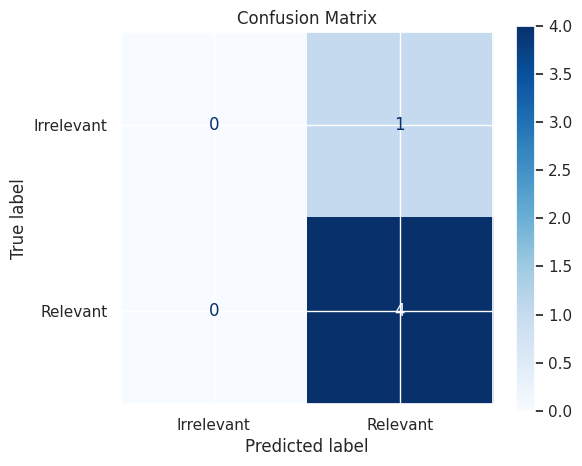

Precision@5: 0.80
Recall@5: 1.00
Mean Reciprocal Rank (MRR): 1.00
Accuracy: 0.80

Confusion Matrix:
[[0 1]
 [0 4]]

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.00      0.00      0.00         1
    Relevant       0.80      1.00      0.89         4

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

def list_relevant(recommended_list, threshold=80):
    """
    Menentukan game yang relevan berdasarkan positive_ratio di atas threshold.
    """
    relevant_games = recommended_list[recommended_list['positive_ratio'] >= threshold]['app_id'].tolist()
    return relevant_games

def evaluate_recommendations(recommended_list, relevant_games, title="Confusion Matrix"):
    """
    Mengevaluasi hasil rekomendasi dengan membuat Confusion Matrix.
    """
    y_true = [1 if i in relevant_games else 0 for i in recommended_list]
    y_pred = [1] * len(recommended_list)  # Semua hasil rekomendasi dianggap positif

    # Hitung metrik evaluasi
    precision = len(set(recommended_list) & set(relevant_games)) / len(recommended_list) if recommended_list else 0
    recall = len(set(recommended_list) & set(relevant_games)) / len(relevant_games) if relevant_games else 0

    mrr = 0
    for rank, rec_idx in enumerate(recommended_list, start=1):
        if rec_idx in relevant_games:
            mrr = 1 / rank
            break

    # Hitung Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred, labels=[0, 1])
    classification_metrics = classification_report(y_true, y_pred, labels=[0,1], target_names=['Irrelevant', 'Relevant'], zero_division=0)
    accuracy = accuracy_score(y_true, y_pred)

    # Visualisasi Confusion Matrix
    fig, ax = plt.subplots(figsize=(6, 5))
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Irrelevant', 'Relevant'])
    disp.plot(ax=ax, cmap='Blues')
    ax.set_title(title)
    plt.show()

    return precision, recall, mrr, conf_matrix, classification_metrics, accuracy

# Data hasil rekomendasi
game_recommended = [1032790, 926520, 376680, 512260, 480640]  # app_id dari rekomendasi

game_recommendations_df = pd.DataFrame({
    'app_id': game_recommended,
    'positive_ratio': [90, 89, 83, 88, 67]  # Sesuai dengan data di atas
})

# Tentukan game yang relevan
relevant_games = list_relevant(game_recommendations_df, threshold=80)

# Evaluasi hasil rekomendasi
precision, recall, mrr, conf_matrix, class_report, accuracy = evaluate_recommendations(game_recommended, relevant_games)

# Cetak hasil evaluasi
print(f"Precision@5: {precision:.2f}")
print(f"Recall@5: {recall:.2f}")
print(f"Mean Reciprocal Rank (MRR): {mrr:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Dari hasil evaluasi rekomendasi:

✅ Precision@5: 0.80 → 80% dari rekomendasi yang diberikan relevan.  
✅ Recall@5: 1.00 → Semua game yang relevan berhasil direkomendasikan.  
✅ MRR: 1.00 → Rekomendasi pertama langsung relevan.  
✅ Accuracy: 0.80 → 80% dari prediksi benar.  

📊 Confusion Matrix menunjukkan bahwa ada 4 game yang benar-benar relevan, sementara 1 game yang tidak relevan tetap direkomendasikan (false positive).

🔍 Kesimpulan: Rekomendasi cukup baik dengan tingkat recall yang sempurna, tetapi ada sedikit kesalahan dalam precision karena satu game yang tidak relevan tetap masuk dalam rekomendasi.

### **Collaborative Filtering**
#### **Evaluasi Metrik RMSE**

**Root Mean Squared Error (RMSE)** adalah metrik evaluasi yang digunakan untuk mengukur seberapa jauh prediksi model dari nilai aktual.  
RMSE merupakan akar kuadrat dari **Mean Squared Error (MSE)**, yang berarti RMSE memiliki satuan yang sama dengan variabel target, sehingga lebih mudah untuk diinterpretasikan.

---

1. **Formula RMSE**  
$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$
di mana:
- $$( n )$$ adalah jumlah sampel,
- $$ y_i $$ adalah nilai aktual,
- $$ \hat{y}_i $$ adalah nilai prediksi dari model,
- $$ (y_i - \hat{y}_i)^2 $$ adalah error kuadrat dari setiap sampel.

---

2. **Cara Perhitungan RMSE**
a. Hitung selisih antara nilai aktual $$(y_i)$$ dan nilai prediksi $$(\hat{y}_i)$$.
b. Kuadratkan selisih tersebut.
c. Hitung rata-rata dari semua error kuadrat (ini disebut **Mean Squared Error - MSE**).
d. Ambil akar kuadrat dari MSE untuk mendapatkan RMSE.

---

3. **Interpretasi RMSE**
- **RMSE kecil** berarti model memiliki prediksi yang lebih akurat.
- **RMSE besar** menunjukkan bahwa prediksi model lebih jauh dari nilai aktual.
- RMSE memiliki keunggulan dibandingkan MSE karena nilainya tetap dalam skala yang sama dengan data asli.
- **RMSE sensitif terhadap outlier**, karena perbedaan besar antara nilai aktual dan prediksi akan dikuadratkan sebelum dihitung rata-ratanya.

---

RMSE sering digunakan dalam **evaluasi model regresi dan machine learning** untuk menilai seberapa baik model dalam melakukan prediksi.


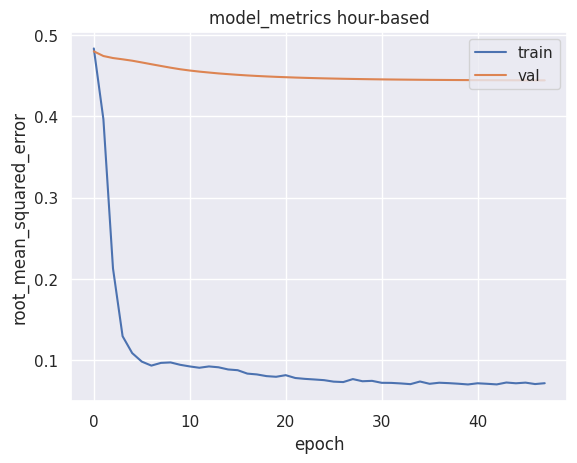

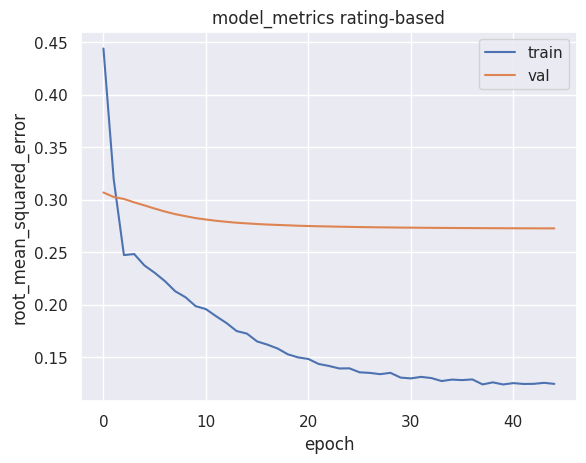

In [ ]:
def vizMetrics(history, title):
    plt.plot(history.history['root_mean_squared_error'])
    plt.plot(history.history['val_root_mean_squared_error'])
    plt.title(f'model_metrics {title}')
    plt.ylabel('root_mean_squared_error')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper right')
    plt.show()

metrik_h = vizMetrics(history_h, title='hour-based')
metrik_r = vizMetrics(history_r, title='rating-based')

Grafik pertama menunjukkan RMSE untuk model berbasis jam ```(hour-based)```, sedangkan grafik kedua menunjukkan RMSE untuk model berbasis rating ```(rating-based)```.

1. Tren pada kedua grafik menunjukkan bahwa RMSE pada data latih (train) menurun seiring bertambahnya epoch, yang menandakan model semakin baik dalam menyesuaikan data latih.
2. RMSE pada data validasi (val) juga menurun tetapi lebih lambat dan cenderung stabil setelah beberapa epoch.
3. Model berbasis jam memiliki RMSE validasi yang lebih tinggi dibandingkan model berbasis rating, yang mungkin menunjukkan bahwa model rating-based lebih baik dalam melakukan generalisasi terhadap data baru.
4. Dari kedua grafik ini, tidak terlihat overfitting yang signifikan, tetapi jika RMSE validasi tidak turun lebih jauh, maka model mungkin sudah mencapai batas optimalnya.

## **Persiapkan Laporan**

In [1]:
# !pip install nbconvert
!jupyter nbconvert --to markdown /content/README.ipynb

[NbConvertApp] Converting notebook /content/README.ipynb to markdown
[NbConvertApp] Support files will be in README_files/
[NbConvertApp] Making directory /content/README_files
[NbConvertApp] Writing 122917 bytes to /content/README.md


In [2]:
!zip -r gambar_files.zip gambar_files

	zip warning: name not matched: gambar_files

zip error: Nothing to do! (try: zip -r gambar_files.zip . -i gambar_files)


## **References**

[[1](https://eraspace.com/artikel/post/sejumlah-perbandingan-steam-dan-epic-games-mana-yang-terbaik)]  Sejumlah perbandingan steam dan epic games mana yang terbaik
  
[[2](https://www.semanticscholar.org/paper/Implementasi-Chatbot-Telegram-untuk-Meningkatkan-Yuwan-Soelistijadi/fe61864360798ba62bada1ea70b790a0bd6e5f69)] Yuwan, Ridho Pangestu et al. “Implementasi Chatbot Telegram untuk Meningkatkan Kualitas Layanan Jaringan Internet Pada Layanan ICONNET Menggunakan Penerapan Metode Action Research (AR).” Jurnal JTIK (Jurnal Teknologi Informasi dan Komunikasi) (2024): n. pag.

[[3](https://www.semanticscholar.org/paper/Analisis-Penerapan-UI-UX-Dalam-Meningkatkan-Pada-Syafei-Hidayatullah/ca7cfbaa16740716159ba1660203ce012d26ba16)] Syafei, Tubagus Fandi Maulana and Azka Fariz Hidayatullah. “Analisis Penerapan UI/UX Dalam Meningkatkan Pengalaman Pengguna Pada Sistem Reservasi Amadeus.” JUSTINFO | Jurnal Sistem Informasi dan Teknologi Informasi (2023): n. pag.

[[4](https://www.semanticscholar.org/paper/Implementasi-Chatbot-Telegram-untuk-Meningkatkan-Yuwan-Soelistijadi/fe61864360798ba62bada1ea70b790a0bd6e5f69)] Yuwan, Ridho Pangestu et al. “Implementasi Chatbot Telegram untuk Meningkatkan Kualitas Layanan Jaringan Internet Pada Layanan ICONNET Menggunakan Penerapan Metode Action Research (AR).” Jurnal JTIK (Jurnal Teknologi Informasi dan Komunikasi) (2024): n. pag.

[[5](https://www.semanticscholar.org/paper/Analisis-Penerapan-UI-UX-Dalam-Meningkatkan-Pada-Syafei-Hidayatullah/ca7cfbaa16740716159ba1660203ce012d26ba16)] Syafei, Tubagus Fandi Maulana and Azka Fariz Hidayatullah. “Analisis Penerapan UI/UX Dalam Meningkatkan Pengalaman Pengguna Pada Sistem Reservasi Amadeus.” JUSTINFO | Jurnal Sistem Informasi dan Teknologi Informasi (2023): n. pag.  

[[6](https://keras.io/examples/structured_data/collaborative_filtering_movielens/)] Penyaringan Kolaboratif untuk Rekomendasi Film